<a href="https://colab.research.google.com/github/Vali-git/gdp-vs-standard-of-living/blob/main/Top_Economies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Top Economies Analysis: GDP, GNI, and Economic Structure
####Does economic size translate into individual prosperity?


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Vali-git/gdp-vs-standard-of-living/refs/heads/main/Global%20Economy%20Indicators.csv')
df.drop_duplicates(inplace=True)
df

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,1.952772e+08,3.701468e+08,3.766908e+08,1.277478e+08,1.731454e+09,8.391720e+07,2.263871e+08,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,2.762965e+08,3.875495e+08,3.944012e+08,1.337541e+08,1.812857e+09,8.786038e+07,2.370192e+08,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,2.903704e+08,3.522847e+08,3.585129e+08,1.215827e+08,1.647918e+09,7.986452e+07,2.154773e+08,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,2.629629e+08,3.640103e+08,3.704458e+08,1.256302e+08,1.702735e+09,8.252888e+07,2.226243e+08,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,3.056792e+08,4.407604e+08,4.485528e+08,1.521192e+08,2.061752e+09,9.991860e+07,2.695259e+08,2.106420e+09,2.061729e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,9.519501,9.519501,17298054,Kwacha,1448,1.041005e+09,567729313.0,...,1.215309e+10,9.465895e+09,2.102369e+09,7.194153e+09,6.187124e+09,2.416662e+10,1.965026e+09,5.323590e+09,2.505604e+10,2.586816e+10
10508,894,Zambia,2018,10.458143,10.458143,17835893,Kwacha,1451,8.791160e+08,929063411.0,...,1.183200e+10,9.717269e+09,1.801783e+09,6.556884e+09,5.791375e+09,2.422570e+10,2.490720e+09,5.990720e+09,2.588455e+10,2.631198e+10
10509,894,Zambia,2019,12.889418,12.889418,18380477,Kwacha,1246,6.668385e+08,817104395.0,...,9.848112e+09,7.961415e+09,1.582484e+09,5.584425e+09,5.231062e+09,2.153971e+10,2.537646e+09,4.959277e+09,2.291011e+10,2.331036e+10
10510,894,Zambia,2020,18.344093,18.344093,18927715,Kwacha,928,5.391694e+08,439295787.0,...,6.969267e+09,5.892353e+09,1.397303e+09,4.269405e+09,4.217431e+09,1.718020e+10,2.258715e+09,3.234123e+09,1.756233e+10,1.811064e+10


In [32]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

In [33]:
df.columns




Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [34]:
df.columns = df.columns.str.strip()
df.columns

Index(['CountryID', 'Country', 'Year', 'AMA exchange rate',
       'IMF based exchange rate', 'Population', 'Currency', 'Per capita GNI',
       'Agriculture, hunting, forestry, fishing (ISIC A-B)',
       'Changes in inventories', 'Construction (ISIC F)',
       'Exports of goods and services', 'Final consumption expenditure',
       'General government final consumption expenditure',
       'Gross capital formation',
       'Gross fixed capital formation (including Acquisitions less disposals of valuables)',
       'Household consumption expenditure (including Non-profit institutions serving households)',
       'Imports of goods and services', 'Manufacturing (ISIC D)',
       'Mining, Manufacturing, Utilities (ISIC C-E)',
       'Other Activities (ISIC J-P)', 'Total Value Added',
       'Transport, storage and communication (ISIC I)',
       'Wholesale, retail trade, restaurants and hotels (ISIC G-H)',
       'Gross National Income(GNI) in USD', 'Gross Domestic Product (GDP)'],
    

In [7]:
last_year = df['Year'].max()
df_last_year = df[df['Year'] == last_year].copy()
top_countries = df_last_year.sort_values('Gross Domestic Product (GDP)', ascending=False).head(10)
top_countries

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
10144,840,United States,2021,1.000000,1.000000,336997624,US Dollar,70081,2.070000e+11,-1.909100e+10,...,1.590000e+13,3.400000e+12,2.500000e+12,3.270000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13
1999,156,China,2021,6.448975,6.448975,1425893465,Yuan Renminbi,12324,1.350000e+12,1.710000e+11,...,6.800000e+12,3.060000e+12,4.870000e+12,5.780000e+12,5.970000e+12,1.770000e+13,1.410000e+12,1.990000e+12,1.760000e+13,1.770000e+13
4680,392,Japan,2021,109.754324,109.754324,124612530,Yen,41162,5.141133e+10,-4.100977e+09,...,2.660000e+12,9.360000e+11,9.950000e+11,1.150000e+12,2.210000e+12,4.910000e+12,4.910000e+11,7.330000e+11,5.130000e+12,4.940000e+12
3484,276,Germany,2021,0.845494,0.845494,83408554,Euro,52885,3.624035e+10,5.914056e+10,...,2.100000e+12,1.780000e+12,8.030000e+11,9.260000e+11,1.870000e+12,3.850000e+12,3.670000e+11,4.380000e+11,4.410000e+12,4.260000e+12
4212,356,India,2021,73.918013,73.918013,1407563842,Indian Rupee,2239,5.380000e+11,2.951508e+10,...,1.910000e+12,7.650000e+11,4.470000e+11,5.960000e+11,1.040000e+12,2.890000e+12,1.710000e+11,3.060000e+11,3.150000e+12,3.200000e+12
10008,826,United Kingdom,2021,0.727065,0.727065,67281039,Pound Sterling,46338,2.113154e+10,1.140063e+10,...,1.890000e+12,8.990000e+11,2.750000e+11,3.810000e+11,1.600000e+12,2.810000e+12,2.760000e+11,3.580000e+11,3.120000e+12,3.130000e+12
3140,250,France,2021,0.845494,0.845494,66875883,Euro,45535,4.851482e+10,2.332009e+10,...,1.560000e+12,9.290000e+11,2.630000e+11,3.440000e+11,1.470000e+12,2.620000e+12,2.830000e+11,3.280000e+11,3.050000e+12,2.960000e+12
4524,380,Italy,2021,0.845494,0.845494,59240329,Euro,36216,4.066734e+10,-3.742190e+08,...,1.220000e+12,6.390000e+11,3.140000e+11,3.800000e+11,9.250000e+11,1.890000e+12,1.670000e+11,2.830000e+11,2.150000e+12,2.110000e+12
1635,124,Canada,2021,1.253877,1.253877,38155012,Canadian Dollar,51741,3.529815e+10,-2.449204e+09,...,1.080000e+12,6.090000e+11,1.960000e+11,3.360000e+11,9.630000e+11,1.850000e+12,1.440000e+11,2.350000e+11,1.970000e+12,1.990000e+12
4920,410,Republic of Korea,2021,1143.951667,1143.951667,51830139,Won,35329,3.240994e+10,9.406341e+09,...,8.360000e+11,6.960000e+11,4.610000e+11,4.940000e+11,7.300000e+11,1.650000e+12,1.430000e+11,1.580000e+11,1.830000e+12,1.810000e+12


In [35]:
df_last_year['Total_Value_Added_per_capita'] = df_last_year['Total Value Added'] / df_last_year['Population']
df_last_year['Investment_ratio'] = df_last_year['Gross capital formation'] / df_last_year['Total Value Added'] * 100


In [36]:
top_countries = df_last_year.sort_values('Gross Domestic Product (GDP)', ascending=False).head(10)
top_countries

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP),Total_Value_Added_per_capita,Investment_ratio
10144,840,United States,2021,1.000000,1.000000,336997624,US Dollar,70081,2.070000e+11,-1.909100e+10,...,2.500000e+12,3.270000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13,69139.953343,21.115880
1999,156,China,2021,6.448975,6.448975,1425893465,Yuan Renminbi,12324,1.350000e+12,1.710000e+11,...,4.870000e+12,5.780000e+12,5.970000e+12,1.770000e+13,1.410000e+12,1.990000e+12,1.760000e+13,1.770000e+13,12413.269599,42.937853
4680,392,Japan,2021,109.754324,109.754324,124612530,Yen,41162,5.141133e+10,-4.100977e+09,...,9.950000e+11,1.150000e+12,2.210000e+12,4.910000e+12,4.910000e+11,7.330000e+11,5.130000e+12,4.940000e+12,39402.137169,25.458248
3484,276,Germany,2021,0.845494,0.845494,83408554,Euro,52885,3.624035e+10,5.914056e+10,...,8.030000e+11,9.260000e+11,1.870000e+12,3.850000e+12,3.670000e+11,4.380000e+11,4.410000e+12,4.260000e+12,46158.335271,25.766234
4212,356,India,2021,73.918013,73.918013,1407563842,Indian Rupee,2239,5.380000e+11,2.951508e+10,...,4.470000e+11,5.960000e+11,1.040000e+12,2.890000e+12,1.710000e+11,3.060000e+11,3.150000e+12,3.200000e+12,2053.192838,34.532872
10008,826,United Kingdom,2021,0.727065,0.727065,67281039,Pound Sterling,46338,2.113154e+10,1.140063e+10,...,2.750000e+11,3.810000e+11,1.600000e+12,2.810000e+12,2.760000e+11,3.580000e+11,3.120000e+12,3.130000e+12,41765.110078,20.177936
3140,250,France,2021,0.845494,0.845494,66875883,Euro,45535,4.851482e+10,2.332009e+10,...,2.630000e+11,3.440000e+11,1.470000e+12,2.620000e+12,2.830000e+11,3.280000e+11,3.050000e+12,2.960000e+12,39177.052810,28.244275
4524,380,Italy,2021,0.845494,0.845494,59240329,Euro,36216,4.066734e+10,-3.742190e+08,...,3.140000e+11,3.800000e+11,9.250000e+11,1.890000e+12,1.670000e+11,2.830000e+11,2.150000e+12,2.110000e+12,31903.941654,22.328042
1635,124,Canada,2021,1.253877,1.253877,38155012,Canadian Dollar,51741,3.529815e+10,-2.449204e+09,...,1.960000e+11,3.360000e+11,9.630000e+11,1.850000e+12,1.440000e+11,2.350000e+11,1.970000e+12,1.990000e+12,48486.421653,25.513514
4920,410,Republic of Korea,2021,1143.951667,1143.951667,51830139,Won,35329,3.240994e+10,9.406341e+09,...,4.610000e+11,4.940000e+11,7.300000e+11,1.650000e+12,1.430000e+11,1.580000e+11,1.830000e+12,1.810000e+12,31834.759309,35.212121


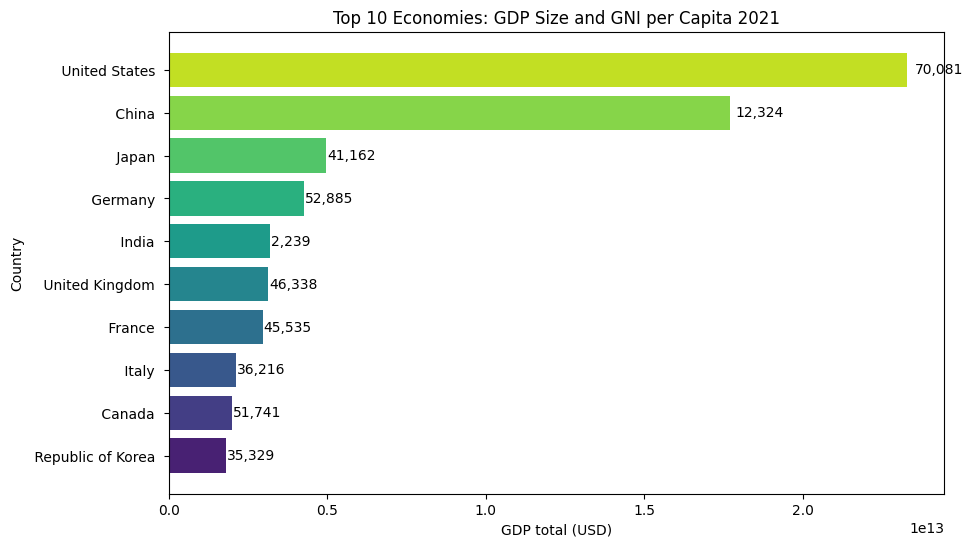

In [48]:
#Evaluate the "Conversion Efficiency": how effectively a nation's total economic
top_countries['Efficiency'] = top_countries['Per capita GNI'] / top_countries['Total_Value_Added_per_capita']

top_countries_sorted = top_countries.sort_values('Gross Domestic Product (GDP)', ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(
    top_countries_sorted['Country'],
    top_countries_sorted['Gross Domestic Product (GDP)'],
    color=sns.color_palette("viridis", n_colors=10)
)

#Overlay GNI per capita as data labels to create an immediate visual contrast.
#Highlight cases where a high total GDP (long bar) does not correlate with
#high individual wealth (label value).
for bar, gni in zip(bars, top_countries_sorted['Per capita GNI']):
    plt.text(bar.get_width()*1.01, bar.get_y() + bar.get_height()/2, f'{int(gni):,}', va='center')

plt.xlabel('GDP total (USD)')
plt.ylabel('Country')
plt.title(f'Top 10 Economies: GDP Size and GNI per Capita {last_year}')
plt.show()


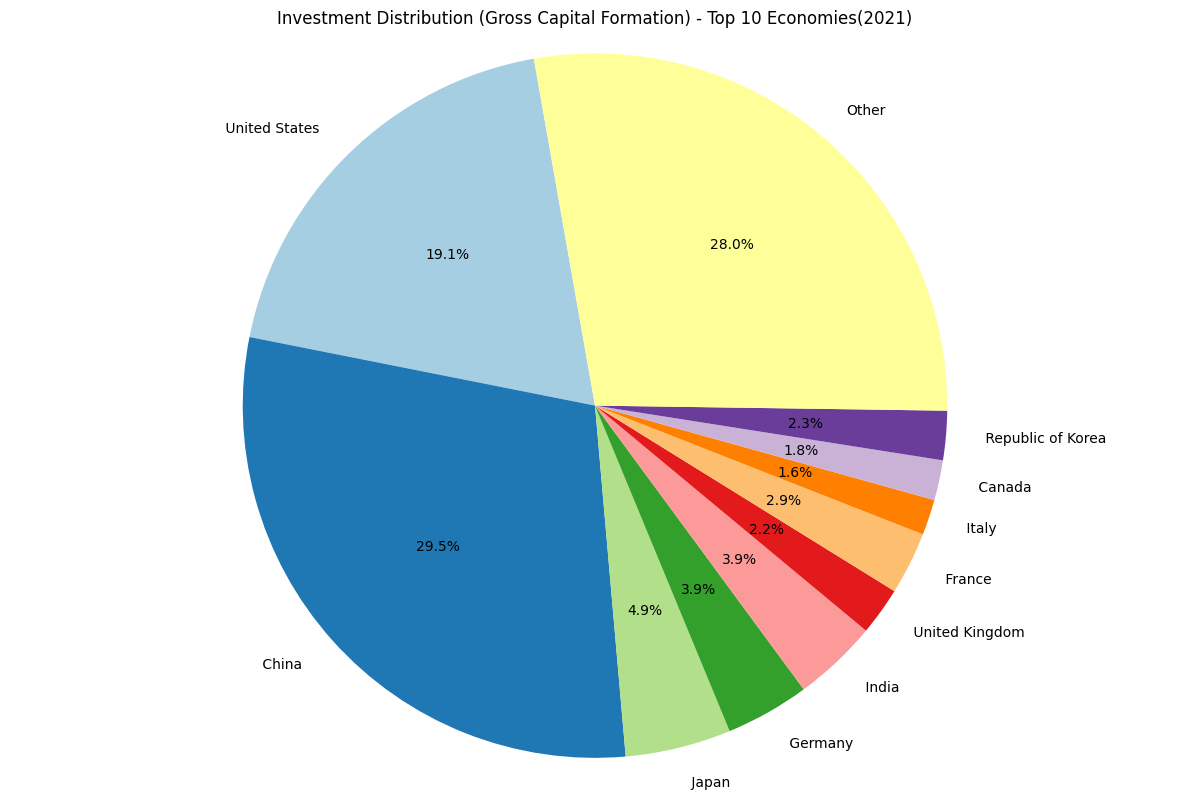

In [38]:
#Analyze the 'Gross Capital Formation' to measure the world's physical investment
#engine.This indicator serves as a primary proxy for future economic potential,
#reflecting expenditures on infrastructure, industrial machinery, and commercial
#construction.

latest_year = df['Year'].max()
df_recent = df[df['Year'] == latest_year].copy()

df_sorted = df_recent.sort_values(by='Gross Domestic Product (GDP)', ascending=False)

top_10 = df_sorted.head(10).copy()
others = df_sorted.iloc[10:].copy()

#Consolidate the rest of the world into an 'Other' category.
others_investment = others['Gross capital formation'].sum()

pie_data = top_10[['Country', 'Gross capital formation']].copy()
new_row = pd.DataFrame({'Country': ['Other'], 'Gross capital formation': [others_investment]})
pie_data = pd.concat([pie_data, new_row], ignore_index=True)

plt.figure(figsize=(12, 8))
plt.pie(
    pie_data['Gross capital formation'],
    labels=pie_data['Country'],
    autopct='%1.1f%%',
    startangle=100,
    colors=plt.cm.Paired.colors
)

plt.title(f'Investment Distribution (Gross Capital Formation) - Top 10 Economies({latest_year})')
plt.axis('equal')
plt.tight_layout()
plt.show()

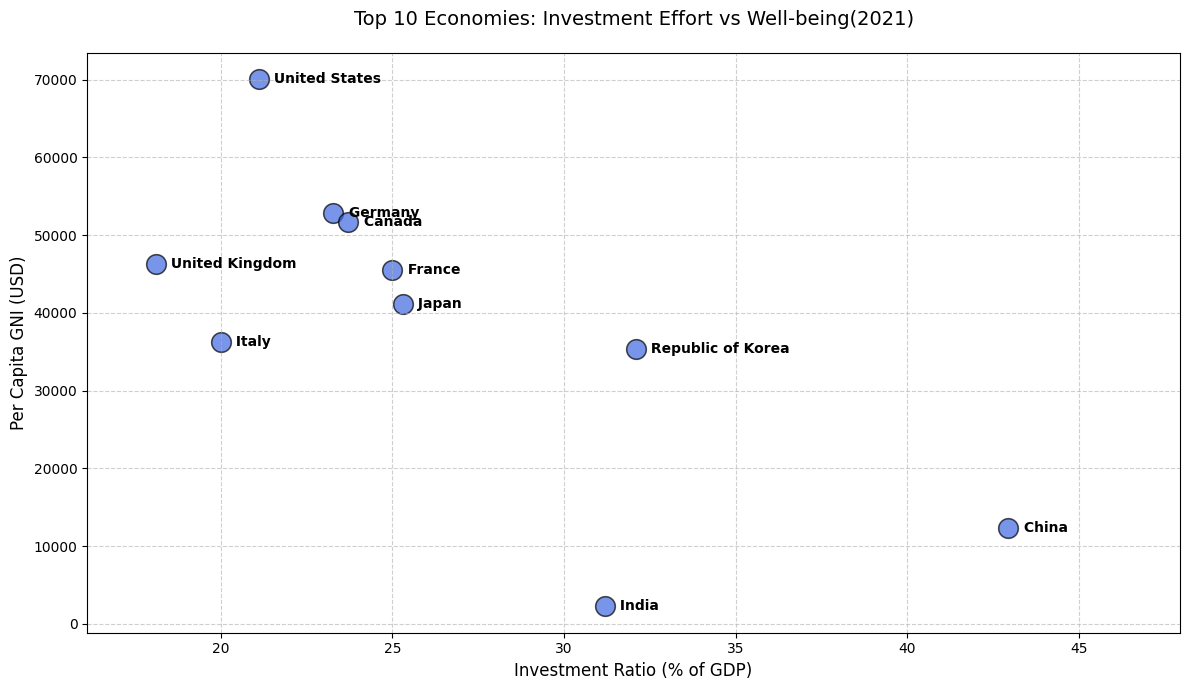

In [39]:
#Derive the 'Investment Ratio' as a percentage of total GDP.
#This metric quantifies a nation's "reinvestment intensity"—how much of its
#economic output is channeled back into future growth versus current consumption.
#Identify which economies are in a "build phase" (high investment, lower GNI)
#versus "mature phase" (optimized investment, high GNI).
latest_year = df['Year'].max()
df_recent = df[df['Year'] == latest_year].copy()

df_recent['Investment_ratio'] = (df_recent['Gross capital formation'] / df_recent['Gross Domestic Product (GDP)']) * 100

top_10_economies = df_recent.sort_values(by='Gross Domestic Product (GDP)', ascending=False).head(10)

plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=top_10_economies,
    x='Investment_ratio',
    y='Per capita GNI',
    s=200,
    color='royalblue',
    alpha=0.7,
    edgecolor='black'
)

for i, row in top_10_economies.iterrows():
    plt.text(
        row['Investment_ratio'] + 0.3,
        row['Per capita GNI'],
        row['Country'],
        fontsize=10,
        fontweight='semibold',
        va='center'
    )

plt.xlabel('Investment Ratio (% of GDP)', fontsize=12)
plt.ylabel('Per Capita GNI (USD)', fontsize=12)
plt.title(f'Top 10 Economies: Investment Effort vs Well-being({latest_year})', fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.6)

plt.xlim(top_10_economies['Investment_ratio'].min() - 2, top_10_economies['Investment_ratio'].max() + 5)

plt.tight_layout()
plt.show()

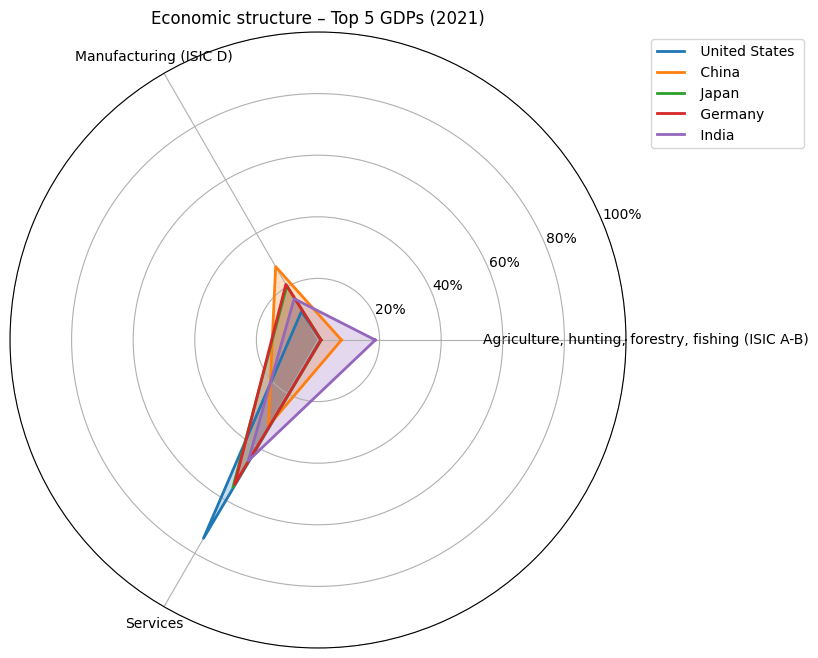

In [40]:
#Focus on the Top 5 global leaders to provide a clear, high-impact structural comparison.
#This prevents visual clutter while highlighting the most influential economic models.
#Contrast the "industrial-heavy" model (e.g., China) against the "services-heavy"
#model (e.g., USA).

from math import pi
radar_top = top_countries.head(5).copy()

radar_top['Services'] = (
    radar_top['Total Value Added']
    - radar_top['Agriculture, hunting, forestry, fishing (ISIC A-B)']
    - radar_top['Manufacturing (ISIC D)']
    - radar_top['Mining, Manufacturing, Utilities (ISIC C-E)']
)

categories = [
    'Agriculture, hunting, forestry, fishing (ISIC A-B)',
    'Manufacturing (ISIC D)',
    'Services'
]

for cat in categories:
    radar_top[cat + '_pct'] = radar_top[cat] / radar_top['Total Value Added'] * 100

N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

for i, row in radar_top.iterrows():
    values = [row[cat + '_pct'] for cat in categories]
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=row['Country'])
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

yticks = [20, 40, 60, 80, 100]
ax.set_yticks(yticks)
ax.set_yticklabels([f'{y}%' for y in yticks])

plt.title(f'Economic structure – Top 5 GDPs ({last_year})')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

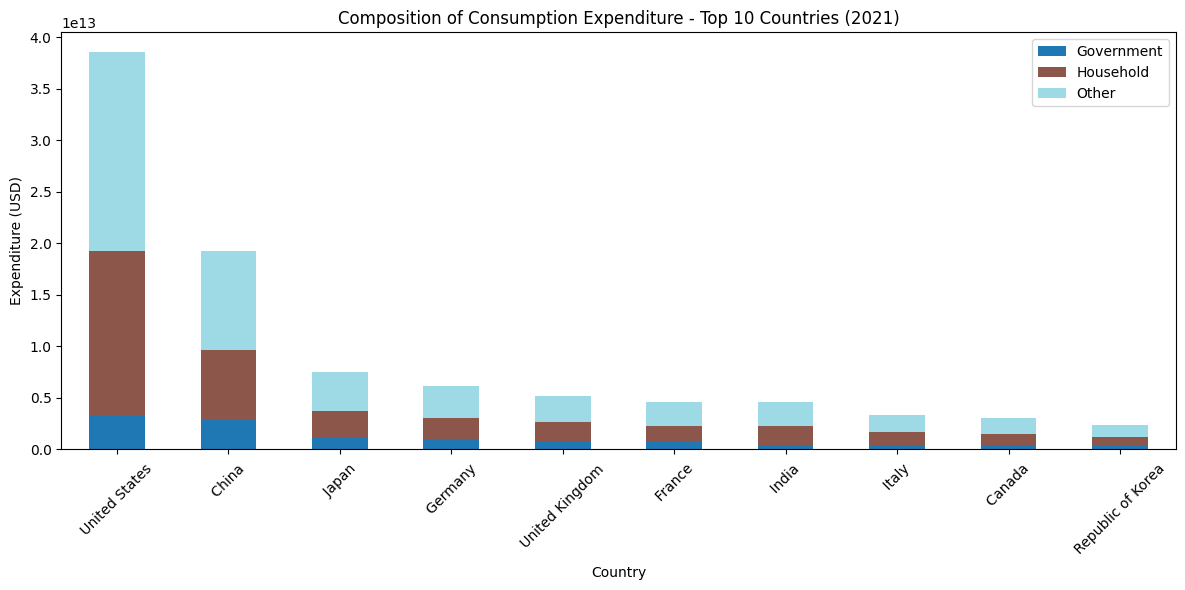

In [41]:
#Define the core pillars of national expenditure.
#We look at Government vs. Household spending to understand the balance between
#public sector intervention and private consumer demand.

max_year = top_countries['Year'].max()
data_last_year = top_countries[top_countries['Year'] == max_year]

consumption_cols = [
    'General government final consumption expenditure',
    'Household consumption expenditure (including Non-profit institutions serving households)',
    'Final consumption expenditure'
]

stacked_data = data_last_year[['Country'] + consumption_cols].copy()

stacked_data.rename(columns={
    'General government final consumption expenditure': 'Government',
    'Household consumption expenditure (including Non-profit institutions serving households)': 'Household',
    'Final consumption expenditure': 'Other'
}, inplace=True)

stacked_data['Total'] = stacked_data[['Government','Household','Other']].sum(axis=1)
stacked_data = stacked_data.sort_values('Total', ascending=False).head(10)

stacked_data.set_index('Country')[['Government','Household','Other']].plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'
)

plt.ylabel('Expenditure (USD)')
plt.title(f'Composition of Consumption Expenditure - Top 10 Countries ({max_year})')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


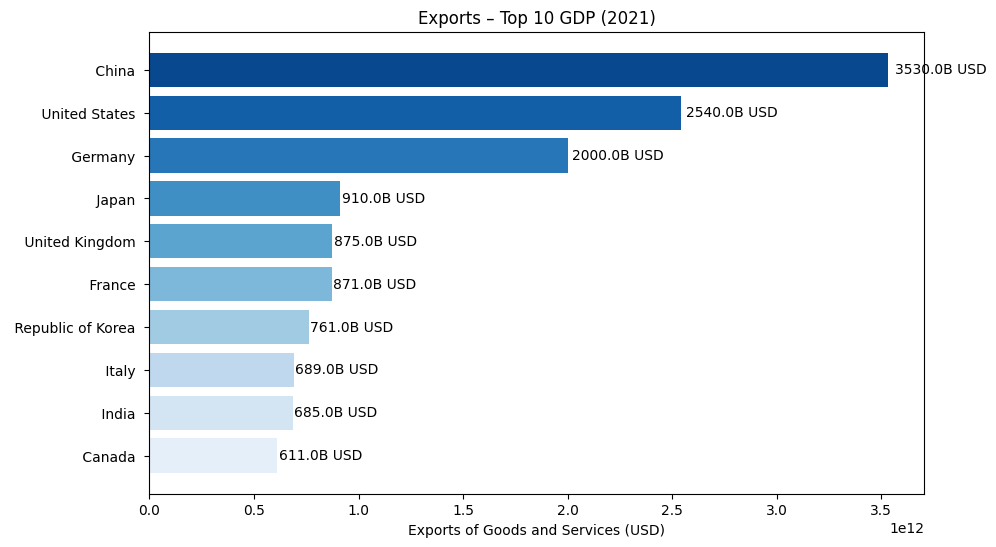

In [42]:
#Analyze the external trade performance of the world's leading economies.
#Sorting by export volume highlights which nations act as the primary suppliers
#to the global market, defining their roles as "Global Creditors."

top_countries_sorted = top_countries.sort_values('Exports of goods and services', ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(
    top_countries_sorted['Country'],
    top_countries_sorted['Exports of goods and services'],
    color=sns.color_palette("Blues", n_colors=10)
)

for bar, export in zip(bars, top_countries_sorted['Exports of goods and services']):
    plt.text(bar.get_width()*1.01, bar.get_y() + bar.get_height()/2, f'{export/1e9:.1f}B USD', va='center')

plt.xlabel('Exports of Goods and Services (USD)')
plt.title(f'Exports – Top 10 GDP ({last_year})')
plt.show()


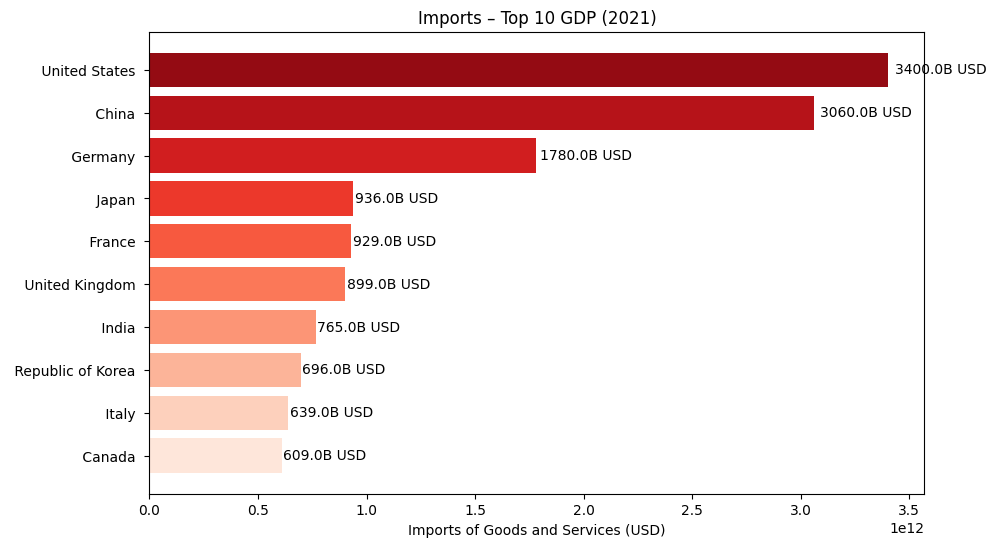

In [43]:
#Analyze the import footprint of the world's leading economies.
#Sorting by import volume identifies the primary "Global Demand Engines"—nations
#that drive the exports of other countries and sustain global supply chains.

top_countries_sorted = top_countries.sort_values('Imports of goods and services', ascending=True)

plt.figure(figsize=(10,6))
bars = plt.barh(
    top_countries_sorted['Country'],
    top_countries_sorted['Imports of goods and services'],
    color=sns.color_palette("Reds", n_colors=10)
)

for bar, imp in zip(bars, top_countries_sorted['Imports of goods and services']):
    plt.text(bar.get_width()*1.01, bar.get_y() + bar.get_height()/2, f'{imp/1e9:.1f}B USD', va='center')

plt.xlabel('Imports of Goods and Services (USD)')
plt.title(f'Imports – Top 10 GDP ({last_year})')
plt.show()


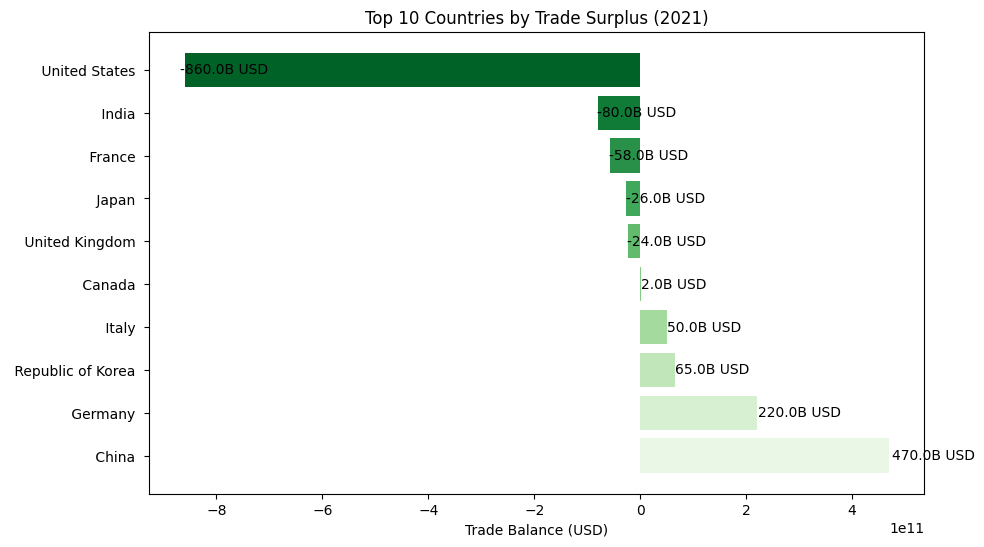

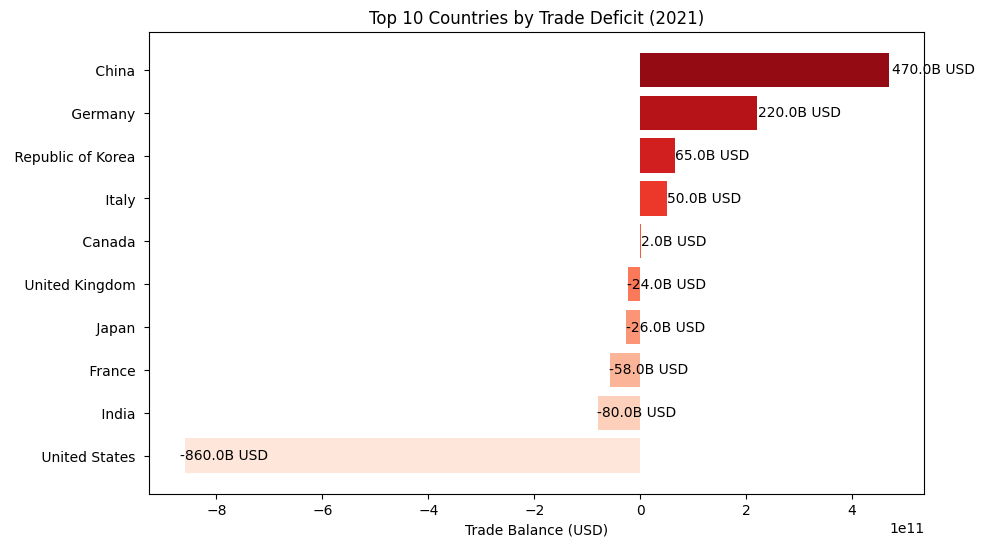

In [44]:
#Calculate the 'Trade Balance' to determine the net flow of wealth.
#Trade Balance = Exports - Imports. A positive value (Surplus) indicates a
#net inflow of capital, while a negative value (Deficit) indicates a net outflow.

top_countries['Trade_Balance'] = top_countries['Exports of goods and services'] - top_countries['Imports of goods and services']

max_year = top_countries['Year'].max()
data_last_year = top_countries[top_countries['Year'] == max_year].copy()

#--- Top 10 Trade Surpluses ---
#Identify the "Global Creditors"—nations that produce more for the world than they consume.
#A high surplus often reflects a highly competitive manufacturing or resource sector.
top_surplus = data_last_year.sort_values(by='Trade_Balance', ascending=False).head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(
    top_surplus['Country'],
    top_surplus['Trade_Balance'],
    color=sns.color_palette("Greens", n_colors=10)
)

for bar, tb in zip(bars, top_surplus['Trade_Balance']):
    plt.text(bar.get_width()*1.01, bar.get_y() + bar.get_height()/2, f'{tb/1e9:.1f}B USD', va='center')

plt.xlabel('Trade Balance (USD)')
plt.title(f'Top 10 Countries by Trade Surplus ({max_year})')
plt.show()

#--- Top 10 Trade Deficits ---
#Identify the "Global Debtors"—nations that act as the primary engines of global demand.
#While seen as a "deficit," this often reflects a strong domestic currency and
#an economy that provides a massive market for other nations' goods.
top_deficit = data_last_year.sort_values(by='Trade_Balance').head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(
    top_deficit['Country'],
    top_deficit['Trade_Balance'],
    color=sns.color_palette("Reds", n_colors=10)
)

for bar, tb in zip(bars, top_deficit['Trade_Balance']):
    plt.text(bar.get_width()*1.01, bar.get_y() + bar.get_height()/2, f'{tb/1e9:.1f}B USD', va='center')

plt.xlabel('Trade Balance (USD)')
plt.title(f'Top 10 Countries by Trade Deficit ({max_year})')
plt.show()


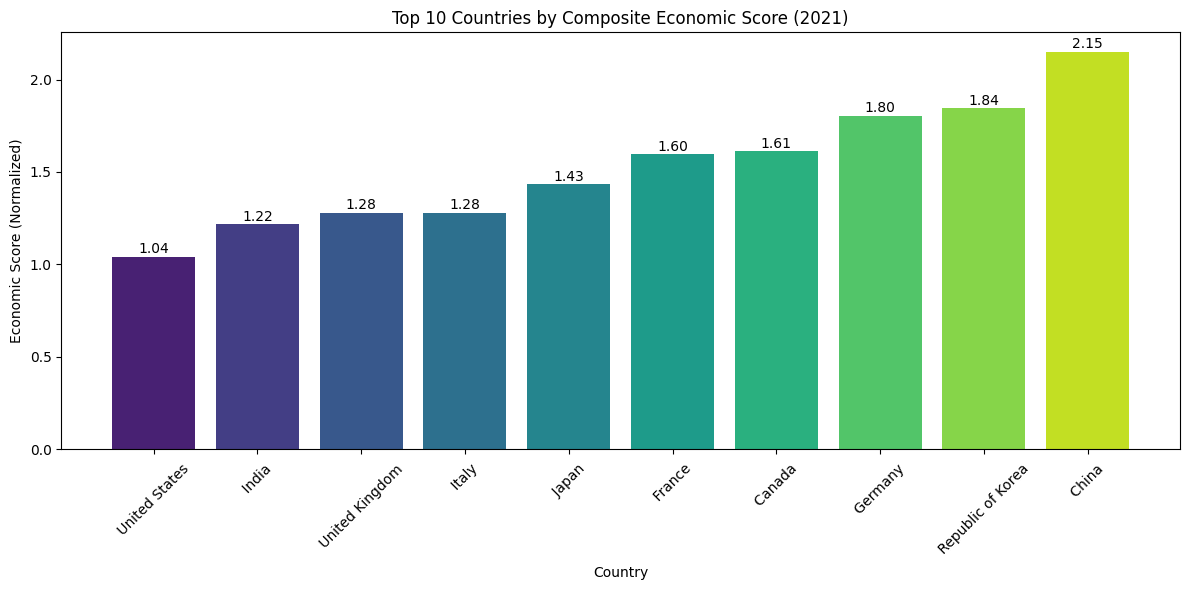

In [46]:
#Create a Synthesis Model to evaluate overall economic health.
#By combining Wealth (GNI), Growth Effort (Investment), and Competitiveness (Trade Balance),
#we move beyond single-metric rankings to a holistic "Composite Economic Score."
#Compute the final Economic Score.

max_year = top_countries['Year'].max()
data_last_year = top_countries[top_countries['Year'] == max_year].copy()

if 'Trade_Balance' not in data_last_year.columns:
    data_last_year['Trade_Balance'] = data_last_year['Exports of goods and services'] - data_last_year['Imports of goods and services']

def min_max(series):
    return (series - series.min()) / (series.max() - series.min())

data_last_year['Per_capita_GNI_norm'] = min_max(data_last_year['Per capita GNI'])
data_last_year['Investment_ratio_norm'] = min_max(data_last_year['Investment_ratio'])
data_last_year['Trade_Balance_norm'] = min_max(data_last_year['Trade_Balance'])

data_last_year['Economic_Score'] = (
    data_last_year['Per_capita_GNI_norm'] +
    data_last_year['Investment_ratio_norm'] +
    data_last_year['Trade_Balance_norm']
)

top10_score = data_last_year.sort_values(by='Economic_Score', ascending=True).head(10)

plt.figure(figsize=(12,6))
bars = plt.bar(
    top10_score['Country'],
    top10_score['Economic_Score'],
    color=sns.color_palette("viridis", n_colors=10)
)

for bar, score in zip(bars, top10_score['Economic_Score']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f'{score:.2f}', ha='center')

plt.ylabel('Economic Score (Normalized)')
plt.xlabel('Country')
plt.title(f'Top 10 Countries by Composite Economic Score ({max_year})')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()